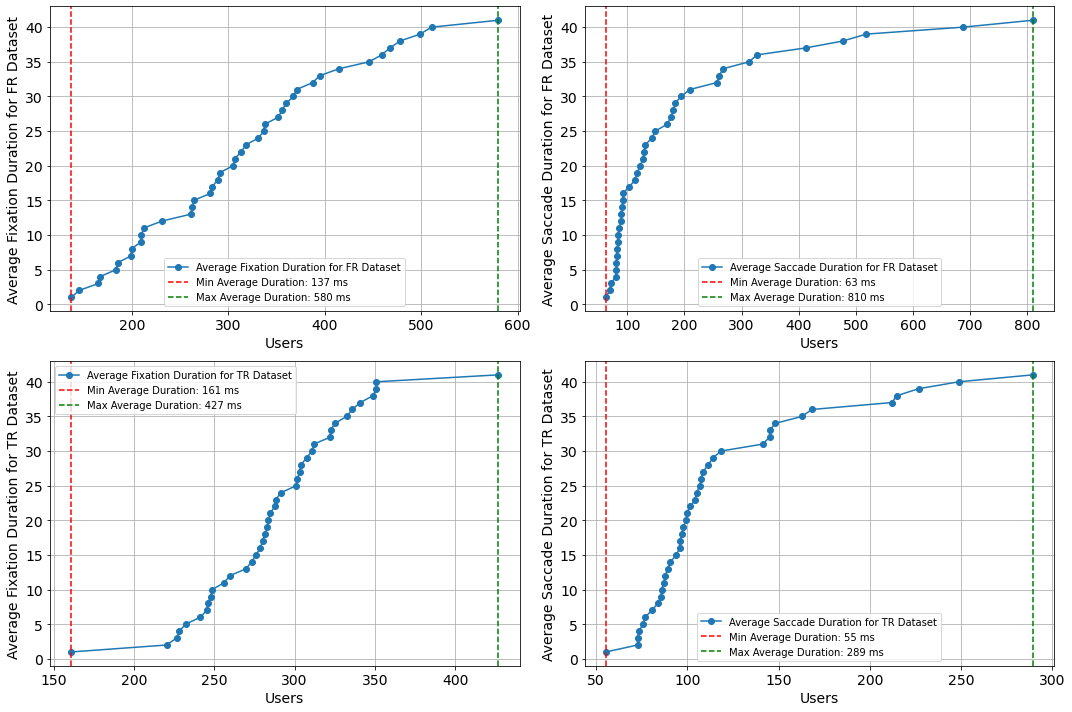

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to process each CSV file
def process_csv(file_path, title, ax):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Group by user_id and calculate average and total fixation duration
    fixation_stats = data.groupby('user_id')['duration'].agg(['mean', 'sum'])

    # Sort the average and total fixation durations in milliseconds
    sorted_avg_duration_ms = (fixation_stats['mean'] * 1000).sort_values()

    # Plot the sorted average duration values
    ax.plot(sorted_avg_duration_ms, range(1, len(sorted_avg_duration_ms) + 1), marker='o', linestyle='-', label=title)
    ax.grid(True)
    min_avg_ms = sorted_avg_duration_ms.min()
    max_avg_ms = sorted_avg_duration_ms.max()
    ax.axvline(min_avg_ms, color='red', linestyle='--', label=f'Min Average Duration: {min_avg_ms:.0f} ms')
    ax.axvline(max_avg_ms, color='green', linestyle='--', label=f'Max Average Duration: {max_avg_ms:.0f} ms')
    ax.set_xlabel('Users', fontsize=14)  # Increase x-axis label font size
    ax.set_ylabel(f'{title}', fontsize=14)  # Increase y-axis label font size
    ax.legend()

    # Increase font size of grid values
    ax.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size as needed


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Process each CSV file
csv_files = [
    ("test_fix_fr_120.csv", "Average Fixation Duration for FR Dataset"),
    ("test_sac_fr_120.csv", "Average Saccade Duration for FR Dataset"),
    ("test_fix_tr_140.csv", "Average Fixation Duration for TR Dataset"),
    ("test_sac_tr_140.csv", "Average Saccade Duration for TR Dataset")
]

for (file_path, title), ax in zip(csv_files, axs.flatten()):
    process_csv(file_path, title, ax)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('average_durations_subplot.png')

# Show the plot
plt.show()
